In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
run_data_path = "/run/media/dima/Scratch/perturb_experiment/run_out/resnet18_perturb_experiment/12/run_data.parquet"
run_data = pd.read_parquet(run_data_path)
run_data

,epoch_num,run_num,time,train_loss,test_accuracy,quant_2_test_accuracy,quant_2_centers,quant_4_test_accuracy,quant_4_centers,quant_8_test_accuracy,...,quant_16_test_accuracy,quant_16_centers,quant_32_test_accuracy,quant_32_centers,quant_64_test_accuracy,quant_64_centers,quant_128_test_accuracy,quant_128_centers,quant_256_test_accuracy,quant_256_centers
0,0,0,2025-01-27 00:47:23.696884,"[[4.928475379943848, 4.926117897033691, 0.2357...",0.0416,NaN,None,NaN,None,NaN,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
1,1,0,2025-01-27 00:47:55.496768,"[[4.199260234832764, 4.199100017547607, 0.0160...",0.0835,NaN,None,NaN,None,NaN,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
2,2,0,2025-01-27 00:48:26.765095,"[[4.084227561950684, 4.084195137023926, 0.0032...",0.1079,NaN,None,NaN,None,NaN,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
3,3,0,2025-01-27 00:48:57.951028,"[[3.7836809158325195, 3.7835850715637207, 0.00...",0.1257,NaN,None,NaN,None,NaN,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
4,4,0,2025-01-27 00:49:29.108403,"[[3.650477409362793, 3.6504063606262207, 0.007...",0.1504,NaN,None,NaN,None,NaN,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
5,5,0,2025-01-27 00:50:00.466034,"[[3.412104845046997, 3.4118194580078125, 0.028...",0.1796,NaN,None,NaN,None,NaN,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
6,6,0,2025-01-27 00:50:31.473579,"[[3.20986270904541, 3.20967435836792, 0.018842...",0.1998,NaN,None,NaN,None,NaN,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
7,7,0,2025-01-27 00:51:02.315045,"[[3.0709338188171387, 3.0708532333374023, 0.00...",0.2057,NaN,None,NaN,None,NaN,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
8,8,0,2025-01-27 00:51:33.557176,"[[3.140974998474121, 3.140944719314575, 0.0030...",0.1965,NaN,None,NaN,None,NaN,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
9,9,0,2025-01-27 00:52:05.324527,"[[3.135634183883667, 3.1355140209198, 0.012006...",0.2148,NaN,None,NaN,None,NaN,...,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None


In [38]:
objective_loss = []
perturb_loss = []
for loss in run_data["train_loss"][0]:
    objective_loss.append(loss[1])
    perturb_loss.append(loss[2])

objective_loss = np.array(objective_loss)
perturb_loss = np.array(perturb_loss)

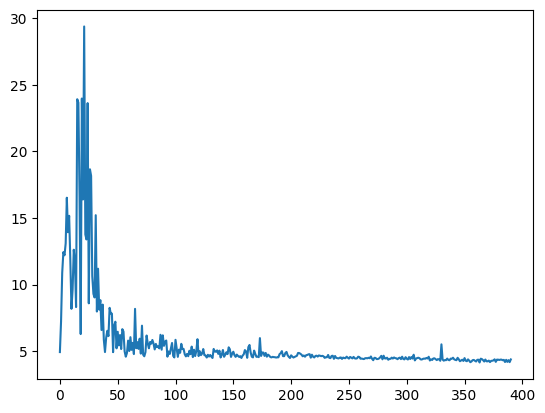

In [39]:
plt.plot(objective_loss)

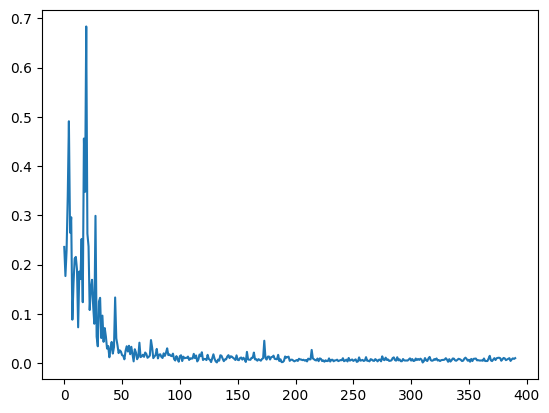

In [40]:
plt.plot(perturb_loss)

In [41]:
perturb_loss[60:].mean()

np.float64(0.008762705001946302)

In [42]:
perturb_loss.mean()

np.float64(0.027833012058911727)

In [43]:
objective_loss[70:].mean()

np.float64(4.652519882653732)

In [44]:
objective_loss.mean()

np.float64(5.587160820241475)